In [1]:
import pandas as pd
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from config import fontsize, colors, ticksize

In [2]:
plt.rcParams["legend.fontsize"] = 'large'
plt.rcParams["font.family"] = 'Times New Roman'

In [3]:
bands = [pd.read_csv("bands/带隙.csv"), pd.read_csv("bands/单元原参数.csv"), pd.read_csv("bands/单元调参.csv")]

In [4]:
def split_band_lines(band, bs=21):
    x = band.X.to_list()
    y = band.频率.to_list()

    x_groups = [x[i: i + bs] for i in range(0, len(x), bs)][:7]
    y_groups = [y[i: i + bs] for i in range(0, len(y), bs)][:7]

    return x_groups, y_groups

In [5]:
def interpolate_band(x, y):
    interpolators = [BarycentricInterpolator(xi, yi) for xi, yi in zip(x, y)]
    x_new = np.linspace(0, x[0][-1], 1000)
    y_new = [interpolator(x_new) for interpolator in interpolators]
    return x_new, y_new

In [26]:
def draw(band, name="0"):
    x, y = split_band_lines(band, bs=201)
    fig, ax = plt.subplots()
    # 在 x 轴右侧添加额外标签
    xlim = ax.get_xlim()  # 获取 x 轴范围
    ax.text(xlim[1], -0.1, "X", ha='right', va='center', transform=ax.transAxes, fontsize=fontsize * 1.5)
    ax.text(xlim[0], -0.1, "Γ", ha='right', va='center', transform=ax.transAxes, fontsize=fontsize * 1.5)
    ax.set_ylabel('Frequency (Hz)', fontsize=fontsize * 1.5)
    ax.set_xlabel(' ', fontsize=fontsize * 1.5)
    plt.tick_params(axis='y', labelsize=ticksize * 1.5)
    plt.tick_params(axis='x', labelsize=ticksize * 1.5, colors='white')
    ax.set_xticks([0, 0.5, 1])
    ax.set_ylim(0, 6500)
    ax.set_xlim(0, max(x[0]))
    ax.set_yticks(range(0, 7000, 1000))
    plt.tight_layout()
    prev = None
    for xi, yi in zip(x, y):
        if prev:
            rx, ry = min(xi), prev[1]
            w, h = prev[0] - min(xi), min(yi) - prev[1]
            if h > 300 and ry + h < 6500:
                rect = Rectangle((rx, ry), w, h, color='blue', alpha=0.5)
                ax.add_patch(rect)
                ax.text(rx + w / 2, ry + h / 2, "Band Gap", ha='center', va='center', fontsize=fontsize)
        prev = (xi[-1], yi[-1])
        ax.plot(xi, yi, color='black')
    plt.savefig(f"figures/{name}.pdf")

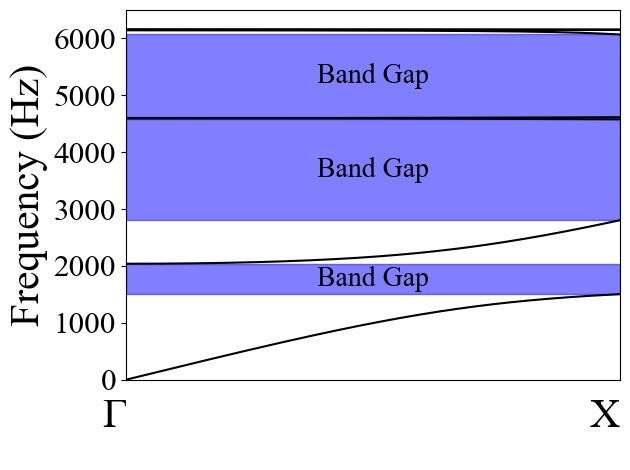

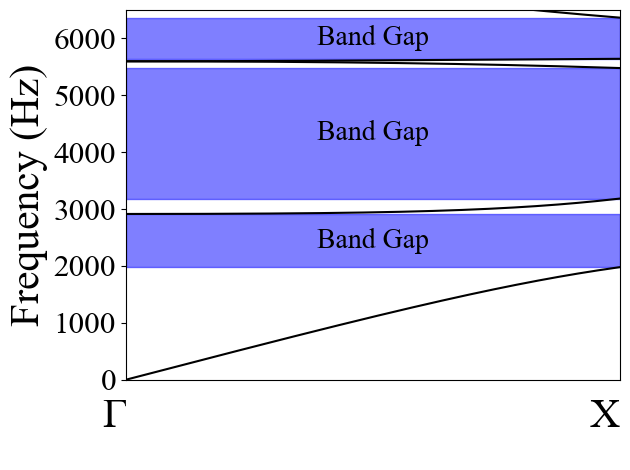

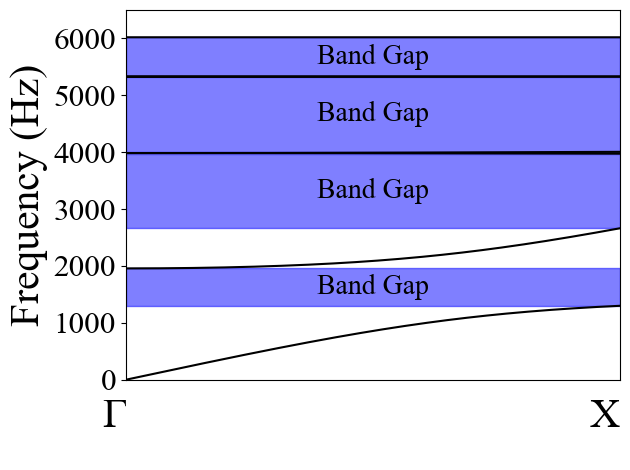

In [28]:
draw(bands[0], "fig1b_bandgap")
draw(bands[1], "fig4a_origin")
draw(bands[2], "fig4c_target")